# Metody Eksploracji Danych: Lab1
*Piotr Gdula*

# Zad 1



## Przygotowywanie danych

### Importowanie potrzebnych bibliotek

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from pandas.plotting import scatter_matrix

### Wczytywanie danych

In [53]:
users_data=pd.read_csv("data/users.csv",sep=";")
stats_data=pd.read_csv("data/stats.csv",sep=";")

### Inspekcja danych

In [54]:
users_data.head()

,rok,kwartal,liczba_uzytkownikow_w_mln
0,2008,1,NaN
1,2008,2,NaN
2,2008,3,100.0
3,2008,4,NaN
4,2009,1,197.0


In [55]:
stats_data.head()

,rok,przychod_w_mln,zysk_w_mln,zatrudnienie
0,2007,153,-138,450
1,2008,272,-56,850
2,2009,777,229,1218
3,2010,1974,606,2127
4,2011,3711,1000,3200


### Przygotowanie dataframe'ów do połączenia

In [56]:
users_data=users_data[3::4]
stats_data=stats_data.drop(0)
stats_data=stats_data.reset_index()
stats_data=stats_data.drop(columns="index")

### Uzupełnienie danych
przyjmujemy, ze wartosc na koniec 2008 roku jest taka sama jak po 3 kwartale tego roku

In [57]:
users_data=users_data.fillna(value=100)
stats_data["liczba_uzytkownikow_w_mln"] = users_data.reset_index()["liczba_uzytkownikow_w_mln"]
stats_data

,rok,przychod_w_mln,zysk_w_mln,zatrudnienie,liczba_uzytkownikow_w_mln
0,2008,272,-56,850,100.0
1,2009,777,229,1218,360.0
2,2010,1974,606,2127,608.0
3,2011,3711,1000,3200,845.0
4,2012,5089,53,4619,1056.0
5,2013,7872,1500,6337,1228.0
6,2014,12466,2940,9199,1393.0
7,2015,17928,3688,12691,1591.0
8,2016,27638,10217,17048,1860.0
9,2017,40653,15934,25105,2129.0


## Badanie danych

### Wykres 0: Sprawdzenie, jak krzyzują sie ze sobą dane

array([[<Axes: xlabel='rok', ylabel='rok'>,
        <Axes: xlabel='przychod_w_mln', ylabel='rok'>,
        <Axes: xlabel='zysk_w_mln', ylabel='rok'>,
        <Axes: xlabel='zatrudnienie', ylabel='rok'>,
        <Axes: xlabel='liczba_uzytkownikow_w_mln', ylabel='rok'>],
       [<Axes: xlabel='rok', ylabel='przychod_w_mln'>,
        <Axes: xlabel='przychod_w_mln', ylabel='przychod_w_mln'>,
        <Axes: xlabel='zysk_w_mln', ylabel='przychod_w_mln'>,
        <Axes: xlabel='zatrudnienie', ylabel='przychod_w_mln'>,
        <Axes: xlabel='liczba_uzytkownikow_w_mln', ylabel='przychod_w_mln'>],
       [<Axes: xlabel='rok', ylabel='zysk_w_mln'>,
        <Axes: xlabel='przychod_w_mln', ylabel='zysk_w_mln'>,
        <Axes: xlabel='zysk_w_mln', ylabel='zysk_w_mln'>,
        <Axes: xlabel='zatrudnienie', ylabel='zysk_w_mln'>,
        <Axes: xlabel='liczba_uzytkownikow_w_mln', ylabel='zysk_w_mln'>],
       [<Axes: xlabel='rok', ylabel='zatrudnienie'>,
        <Axes: xlabel='przychod_w_mln', ylabel=

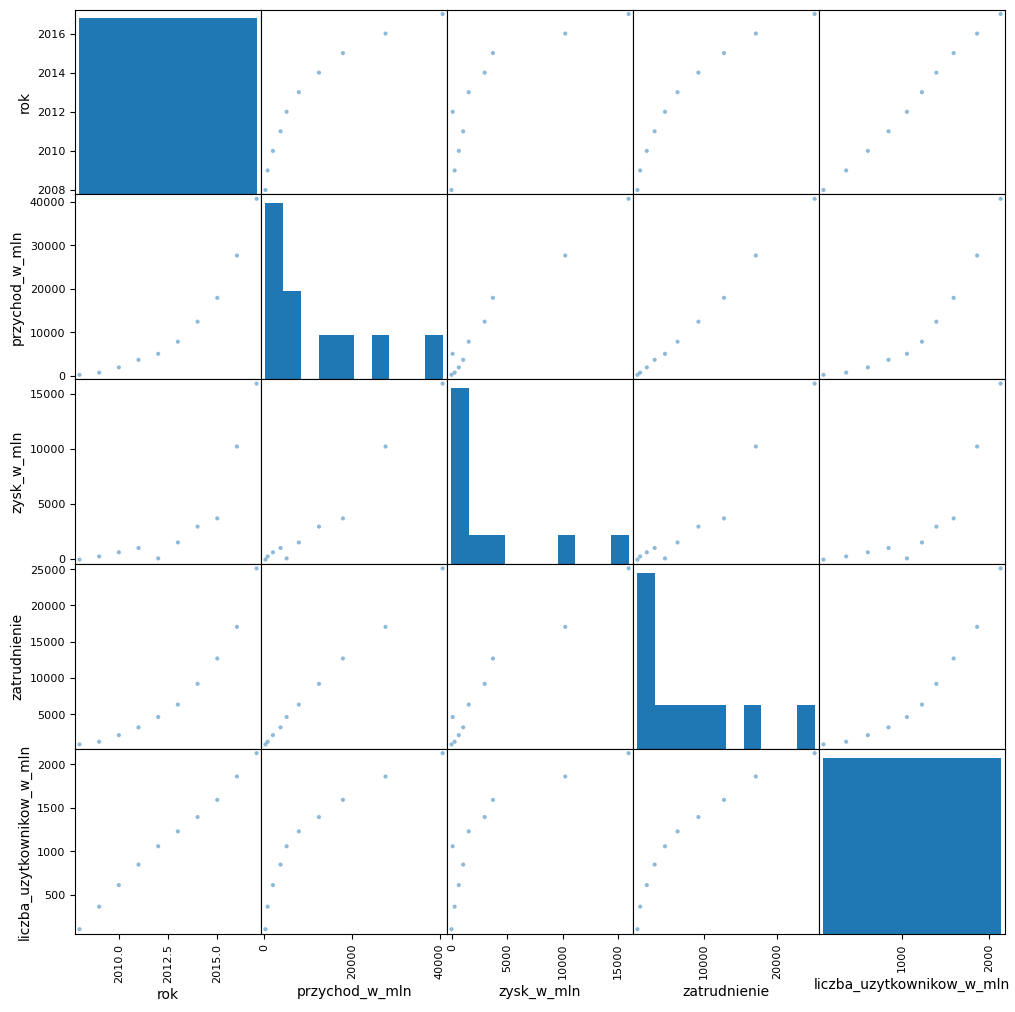

In [58]:
scatter_matrix(stats_data,figsize=(12,12))

### Wykres 1: Zaleznosc przychodow od zatrudnienia w latach 2008-2017

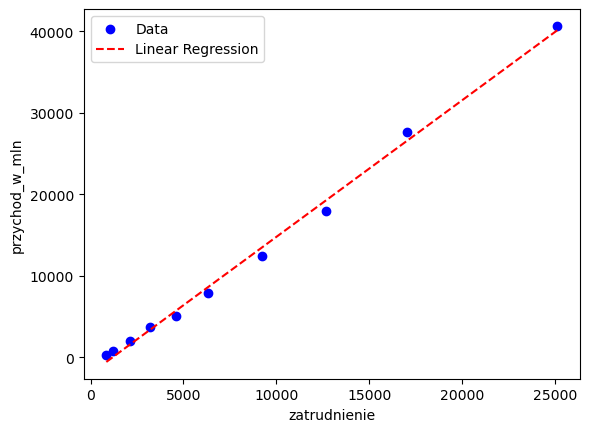

Wlasnosci liniowe: 
slope: 1.6765939768483806
intercept: -1976.128412844546
r^2: 0.9958073517828487
p_value: 8.46333266119875e-11


In [59]:
x1 = np.array(stats_data["zatrudnienie"])
y1 = np.array(stats_data["przychod_w_mln"])
x1 = x1.reshape(-1,1)
y1 = y1.reshape(-1,1)
model1 = LinearRegression()
model1.fit(x1, y1)
plt.scatter(x1, y1, color="blue", label="Data")
plt.plot(x1, model1.predict(x1), linestyle="dashed", color="red", label="Linear Regression")
plt.ylabel("przychod_w_mln")
plt.xlabel("zatrudnienie")
plt.legend()
plt.show()

slope, intercept, r, p, ser=linregress(x1.squeeze(), y1.squeeze())
print(f"Wlasnosci liniowe: \nslope: {slope}\nintercept: {intercept}\nr^2: {r*r}\np_value: {p}")

### Wykres 2: Liczba uzytkownikow w latach 2008-2017 wraz z predykcjami na następne lata

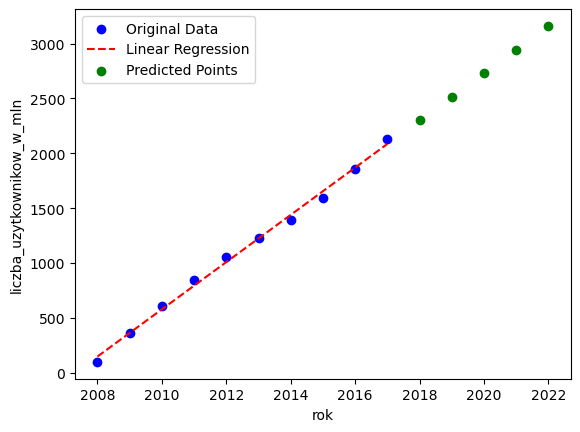

Wlasnosci liniowe: 
slope: 215.10303030303032
intercept: -431777.8484848485
r^2: 0.9957554019333756
p_value: 8.890845390981214e-11


In [60]:
x2 = np.array(stats_data["rok"])
y2 = np.array(stats_data["liczba_uzytkownikow_w_mln"])
x2 = x2.reshape(-1,1)
y2 = y2.reshape(-1,1)
model2 = LinearRegression()
model2.fit(x2, y2)
x2_p = np.array([2018, 2019, 2020, 2021, 2022]).reshape(-1, 1)
y2_p = model2.predict(x2_p)
plt.scatter(x2, y2, color="blue", label="Original Data")
plt.plot(x2, model2.predict(x2), linestyle="dashed", color="red", label="Linear Regression")
plt.scatter(x2_p, y2_p, color="green", label="Predicted Points")
plt.ylabel("liczba_uzytkownikow_w_mln")
plt.xlabel("rok")
plt.legend()
plt.show()

slope, intercept, r, p, ser=linregress(x2.squeeze(), y2.squeeze())
print(f"Wlasnosci liniowe: \nslope: {slope}\nintercept: {intercept}\nr^2: {r*r}\np_value: {p}")

## Przekształecenie funkcji nieliniowej w równanie liniowe

### Wykres 3: Przychody w latach 2008-2017 wraz z próbą predykcji na nastepne lata

Po kilku próbach róznych wzorów najlepszy efekt dał ten ze strony:
https://www.geeksforgeeks.org/how-to-do-exponential-and-logarithmic-curve-fitting-in-python/

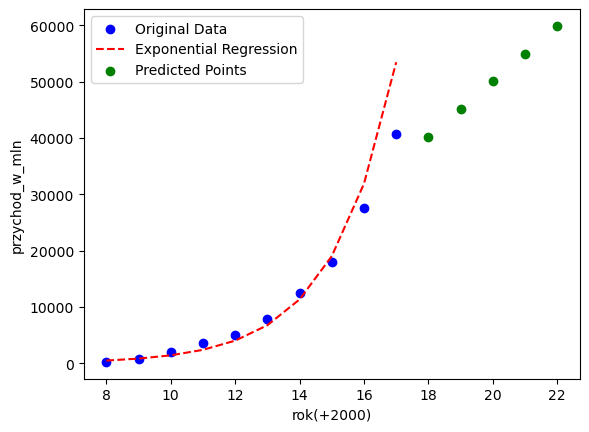

Wlasnosci liniowe: 
slope: 4917.171588114933
intercept: -48282.74752935466
r^2: 0.7386640765938253
p_value: 0.0014356217146781344


In [61]:
x3 = np.array(stats_data["rok"]-2000)
y3 = np.array(stats_data["przychod_w_mln"])
x3 = x3.reshape(-1,1)
y3_log = np.log(y3)
a,b = np.polyfit(stats_data["rok"]-2000, y3_log, 1)
y3_v2 = np.exp(b) * np.exp(a*x3)
model3 = LinearRegression()
model3.fit(x3, y3_v2)
x3_p = np.array([18, 19, 20, 21, 22]).reshape(-1, 1)
y3_p = model3.predict(x3_p)
plt.scatter(x3, y3, color="blue", label="Original Data")
plt.plot(x3, y3_v2, linestyle="dashed", color="red", label="Exponential Regression")
plt.scatter(x3_p, y3_p, color="green", label="Predicted Points")
plt.ylabel("przychod_w_mln")
plt.xlabel("rok(+2000)")
plt.legend()
plt.show()

slope, intercept, r, p, ser=linregress(x3.squeeze(), y3_v2.squeeze())
print(f"Wlasnosci liniowe: \nslope: {slope}\nintercept: {intercept}\nr^2: {r*r}\np_value: {p}")

## Praca z danymi z lat 2018-2020

### Dodanie do dataframe'a danych z lat 2018-2020

In [62]:
users_data_v2=pd.read_csv("data/users_18_20.csv",sep=";")
stats_data_v2=pd.read_csv("data/stats_18_20.csv",sep=";")
users_data_v2=users_data_v2[3::4]
stats_data_v2["liczba_uzytkownikow_w_mln"] = users_data_v2.reset_index()["liczba_uzytkownikow_w_mln"]
stats_data = stats_data.append(stats_data_v2)
stats_data=stats_data.reset_index()
stats_data = stats_data.drop(columns='index')
stats_data

/var/folders/dt/p2cgnnkd5yb72fh34xwdm5z40000gn/T/ipykernel_2651/3588493148.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_data = stats_data.append(stats_data_v2)


,rok,przychod_w_mln,zysk_w_mln,zatrudnienie,liczba_uzytkownikow_w_mln
0,2008,272,-56,850,100.0
1,2009,777,229,1218,360.0
2,2010,1974,606,2127,608.0
3,2011,3711,1000,3200,845.0
4,2012,5089,53,4619,1056.0
5,2013,7872,1500,6337,1228.0
6,2014,12466,2940,9199,1393.0
7,2015,17928,3688,12691,1591.0
8,2016,27638,10217,17048,1860.0
9,2017,40653,15934,25105,2129.0


### Wykres 4: Zaleznosc przychodow od zatrudnienia w latach 2008-2020

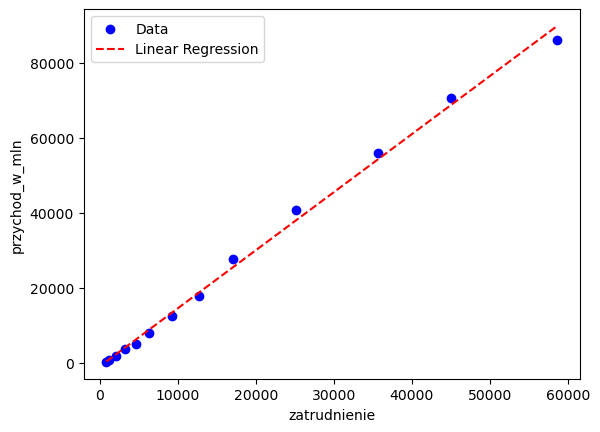

Wlasnosci liniowe: 
slope: 1.5482910287612728
intercept: -931.4051329537288
r^2: 0.9962576124082747
p_value: 1.0577762594876189e-14


In [63]:
x4 = np.array(stats_data["zatrudnienie"])
y4 = np.array(stats_data["przychod_w_mln"])
x4 = x4.reshape(-1,1)
model4 = LinearRegression()
model4.fit(x4, y4)
plt.scatter(x4, y4, color="blue", label="Data")
plt.plot(x4, model4.predict(x4), linestyle="dashed", color="red", label="Linear Regression")
plt.ylabel("przychod_w_mln")
plt.xlabel("zatrudnienie")
plt.legend()
plt.show()

slope, intercept, r, p, ser=linregress(x4.squeeze(), y4.squeeze())
print(f"Wlasnosci liniowe: \nslope: {slope}\nintercept: {intercept}\nr^2: {r*r}\np_value: {p}")

### Wykres 5: Liczba uzytkownikow w latach 2008-2020 wraz z predykcjami na następne lata

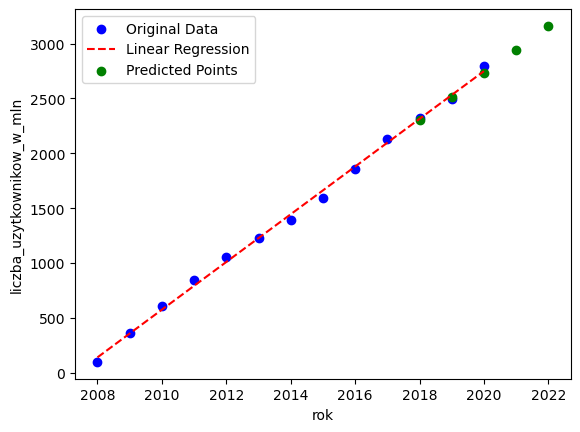

Wlasnosci liniowe: 
slope: 217.26923076923077
intercept: -436135.23076923075
r^2: 0.9976554126689156
p_value: 8.075759339503507e-16


In [64]:
x5 = np.array(stats_data["rok"])
y5 = np.array(stats_data["liczba_uzytkownikow_w_mln"])
x5 = x5.reshape(-1,1)
model5 = LinearRegression()
model5.fit(x5, y5)
plt.scatter(x5, y5, color="blue", label="Original Data")
plt.plot(x5, model5.predict(x5), linestyle="dashed", color="red", label="Linear Regression")
plt.scatter(x2_p, y2_p, color="green", label="Predicted Points")
plt.ylabel("liczba_uzytkownikow_w_mln")
plt.xlabel("rok")
plt.legend()
plt.show()

slope, intercept, r, p, ser=linregress(x5.squeeze(), y5.squeeze())
print(f"Wlasnosci liniowe: \nslope: {slope}\nintercept: {intercept}\nr^2: {r*r}\np_value: {p}")

### Wykres 6: Przychody w latach 2008-2020 wraz z próbą predykcji następnych punktow

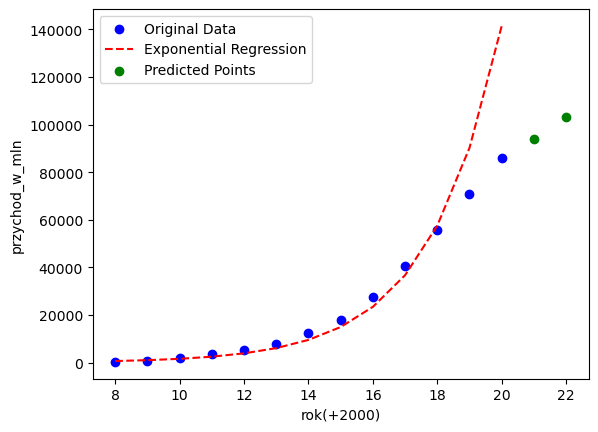

Wlasnosci liniowe: 
slope: 9149.1420325169
intercept: -98137.66277497167
r^2: 0.690686534716997
p_value: 0.00043146329466444593


In [65]:
x6 = np.array(stats_data["rok"]-2000)
y6 = np.array(stats_data["przychod_w_mln"])
x6 = x6.reshape(-1,1)
y6_log = np.log(y6)
a,b = np.polyfit(stats_data["rok"]-2000, y6_log, 1)
y6_v2 = np.exp(b) * np.exp(a*x6)
model6 = LinearRegression()
model6.fit(x6, y6_v2)
x6_p = np.array([21, 22]).reshape(-1, 1)
y6_p = model6.predict(x6_p)
plt.scatter(x6, y6, color="blue", label="Original Data")
plt.plot(x6, y6_v2, linestyle="dashed", color="red", label="Exponential Regression")
plt.scatter(x6_p, y6_p, color="green", label="Predicted Points")
plt.ylabel("przychod_w_mln")
plt.xlabel("rok(+2000)")
plt.legend()
plt.show()

slope, intercept, r, p, ser=linregress(x6.squeeze(), y6_v2.squeeze())
print(f"Wlasnosci liniowe: \nslope: {slope}\nintercept: {intercept}\nr^2: {r*r}\np_value: {p}")

## Praca z danymi z lat 2021-2022

### Dodanie do dataframe'a danych z lat 2021-2022

In [66]:
users_data_v3=pd.read_csv("data/users_21_22.csv",sep=";")
stats_data_v3=pd.read_csv("data/stats_21_22.csv",sep=";")
users_data_v3=users_data_v3[3::4]
stats_data_v3["liczba_uzytkownikow_w_mln"] = users_data_v3.reset_index()["liczba_uzytkownikow_w_mln"]
stats_data = stats_data.append(stats_data_v3)
stats_data=stats_data.reset_index()
stats_data = stats_data.drop(columns='index')
stats_data

/var/folders/dt/p2cgnnkd5yb72fh34xwdm5z40000gn/T/ipykernel_2651/1092874072.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_data = stats_data.append(stats_data_v3)


,rok,przychod_w_mln,zysk_w_mln,zatrudnienie,liczba_uzytkownikow_w_mln
0,2008,272,-56,850,100.0
1,2009,777,229,1218,360.0
2,2010,1974,606,2127,608.0
3,2011,3711,1000,3200,845.0
4,2012,5089,53,4619,1056.0
5,2013,7872,1500,6337,1228.0
6,2014,12466,2940,9199,1393.0
7,2015,17928,3688,12691,1591.0
8,2016,27638,10217,17048,1860.0
9,2017,40653,15934,25105,2129.0


### Wykres 7: Zaleznosc przychodow od zatrudnienia w latach 2008-2022

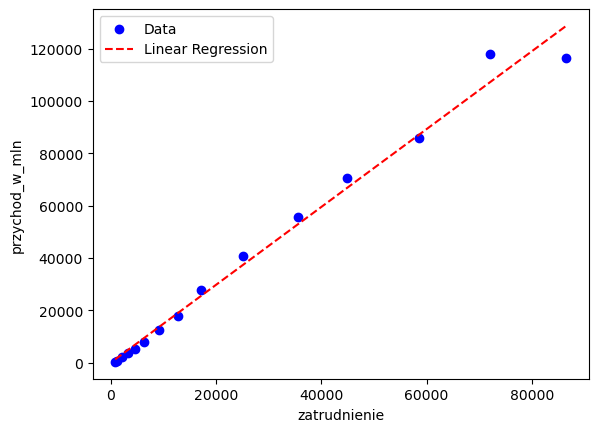

Wlasnosci liniowe: 
slope: 1.4888458581139832
intercept: -20.81068801954825
r^2: 0.9871899635830972
p_value: 1.0917589086765404e-13


In [67]:
x7 = np.array(stats_data["zatrudnienie"])
y7 = np.array(stats_data["przychod_w_mln"])
x7 = x7.reshape(-1,1)
y7 = y7.reshape(-1,1)
model7 = LinearRegression()
model7.fit(x7, y7)
plt.scatter(x7, y7, color="blue", label="Data")
plt.plot(x7, model7.predict(x7), linestyle="dashed", color="red", label="Linear Regression")
plt.ylabel("przychod_w_mln")
plt.xlabel("zatrudnienie")
plt.legend()
plt.show()

slope, intercept, r, p, ser=linregress(x7.squeeze(), y7.squeeze())
print(f"Wlasnosci liniowe: \nslope: {slope}\nintercept: {intercept}\nr^2: {r*r}\np_value: {p}")

### Wykres 8: Liczba uzytkownikow w latach 2008-2022 wraz z wczesniejszymi predykcjami

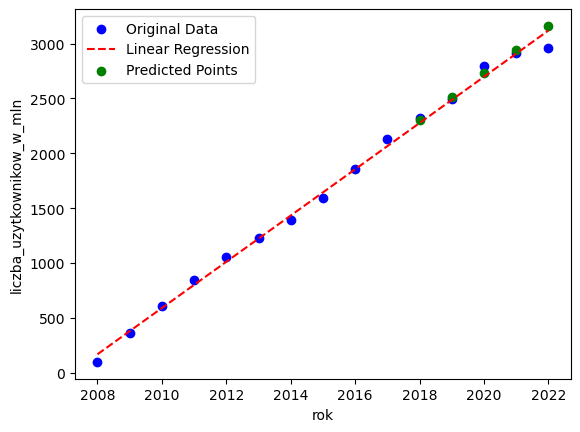

Wlasnosci liniowe: 
slope: 210.61071428571427
intercept: -422736.58928571426
r^2: 0.9956596696011435
p_value: 9.579465849842614e-17


In [68]:
x8 = np.array(stats_data["rok"])
y8 = np.array(stats_data["liczba_uzytkownikow_w_mln"])
x8 = x8.reshape(-1,1)
y8 = y8.reshape(-1,1)
model8 = LinearRegression()
model8.fit(x8, y8)
x8_p = np.array([2018, 2019, 2020, 2021, 2022]).reshape(-1, 1)
y8_p = model8.predict(x8_p)
plt.scatter(x8, y8, color="blue", label="Original Data")
plt.plot(x8, model8.predict(x8), linestyle="dashed", color="red", label="Linear Regression")
plt.scatter(x2_p, y2_p, color="green", label="Predicted Points")
plt.ylabel("liczba_uzytkownikow_w_mln")
plt.xlabel("rok")
plt.legend()
plt.show()

slope, intercept, r, p, ser=linregress(x8.squeeze(), y8.squeeze())
print(f"Wlasnosci liniowe: \nslope: {slope}\nintercept: {intercept}\nr^2: {r*r}\np_value: {p}")

### Wykres 9: Przychody w latach 2008-2020 wraz z predykcją wyznaczoną na wykresie 6

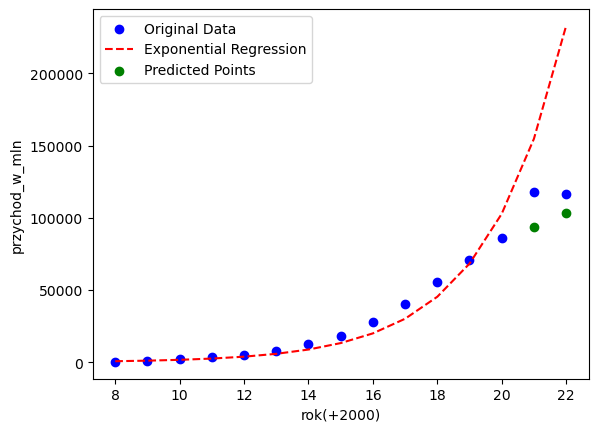

Wlasnosci liniowe: 
slope: 12493.918801730857
intercept: -141252.91181165312
r^2: 0.6712416658176005
p_value: 0.0001860337934117293


In [69]:
x9 = np.array(stats_data["rok"]-2000)
y9 = np.array(stats_data["przychod_w_mln"])
x9 = x9.reshape(-1,1)
y9_log = np.log(y9)
a,b = np.polyfit(stats_data["rok"]-2000, y9_log, 1)
y9_v2 = np.exp(b) * np.exp(a*x9)
model9 = LinearRegression()
model9.fit(x9, y9_v2)
plt.scatter(x9, y9, color="blue", label="Original Data")
plt.plot(x9, y9_v2, linestyle="dashed", color="red", label="Exponential Regression")
plt.scatter(x6_p, y6_p, color="green", label="Predicted Points")
plt.ylabel("przychod_w_mln")
plt.xlabel("rok(+2000)")
plt.legend()
plt.show()

slope, intercept, r, p, ser=linregress(x9.squeeze(), y9_v2.squeeze())
print(f"Wlasnosci liniowe: \nslope: {slope}\nintercept: {intercept}\nr^2: {r*r}\np_value: {p}")

# Zad 2

In [2]:
body_fat=pd.read_csv("data/bf.csv",sep="\t")

In [4]:
body_fat

,Density,Pct.BF,Age,Weight,Height,Neck,Chest,Abdomen,Waist,Hip,Thigh,Knee,Ankle,Bicep,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,33.543307,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,32.677165,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,34.606299,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,34.015748,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,39.370079,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,32.913386,88.8,49.6,34.8,21.5,25.6,25.7,18.5
246,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,41.338583,104.5,59.6,40.8,23.2,35.2,28.6,20.1
247,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,43.897638,101.7,60.3,37.3,21.5,31.3,27.2,18.0
248,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,39.881890,97.8,56.0,41.6,22.7,30.5,29.4,19.8


array([[<Axes: xlabel='Density', ylabel='Density'>,
        <Axes: xlabel='Pct.BF', ylabel='Density'>,
        <Axes: xlabel='Age', ylabel='Density'>,
        <Axes: xlabel='Weight', ylabel='Density'>,
        <Axes: xlabel='Height', ylabel='Density'>,
        <Axes: xlabel='Neck', ylabel='Density'>,
        <Axes: xlabel='Chest', ylabel='Density'>,
        <Axes: xlabel='Abdomen', ylabel='Density'>,
        <Axes: xlabel='Waist', ylabel='Density'>,
        <Axes: xlabel='Hip', ylabel='Density'>,
        <Axes: xlabel='Thigh', ylabel='Density'>,
        <Axes: xlabel='Knee', ylabel='Density'>,
        <Axes: xlabel='Ankle', ylabel='Density'>,
        <Axes: xlabel='Bicep', ylabel='Density'>,
        <Axes: xlabel='Forearm', ylabel='Density'>,
        <Axes: xlabel='Wrist', ylabel='Density'>],
       [<Axes: xlabel='Density', ylabel='Pct.BF'>,
        <Axes: xlabel='Pct.BF', ylabel='Pct.BF'>,
        <Axes: xlabel='Age', ylabel='Pct.BF'>,
        <Axes: xlabel='Weight', ylabel='Pct.BF'>

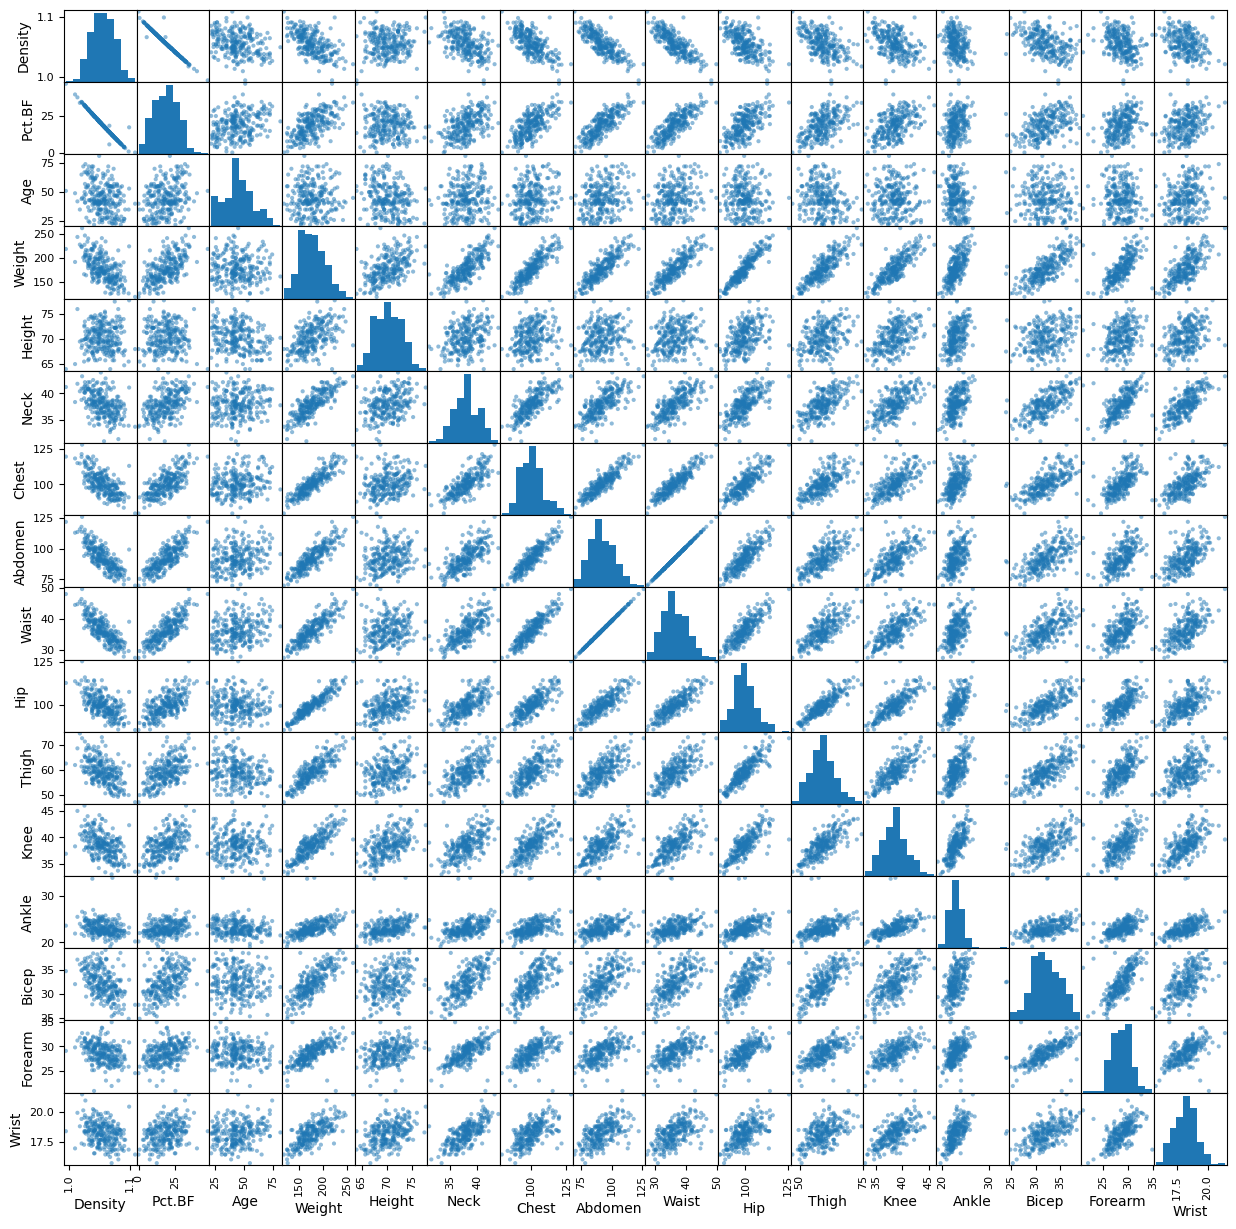

In [5]:
scatter_matrix(body_fat,figsize=(15,15))

### Przy liczenie BF najlepiej uzyć wagi, wzrostu oraz Gestości. Wzrost i waga są są najbardziej podstawowymi wartościami, a gęstość idealnie w sposób liniowy odzwierciedla BF

In [4]:
x10 = body_fat[["Weight","Height","Density"]]
y10 = body_fat["Pct.BF"]
model10 = LinearRegression()
model10.fit(x10, y10)
x10_1,x10_2,x10_3 = model10.coef_
x10 = body_fat["Weight"]*x10_1+body_fat["Height"]*x10_2+body_fat["Density"]*x10_3
x10 = np.array(x10)
x10 = x10.reshape(-1,1)

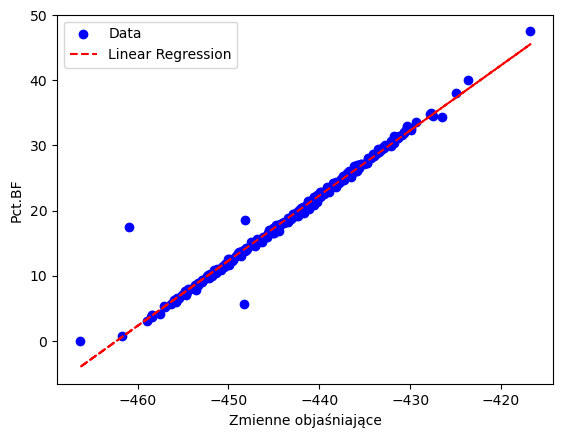

Wlasnosci liniowe: 
slope: 0.9999999999999786
intercept: 462.2960054253641
r^2: 0.976342813565221
p_value: 1.2046382164799312e-203


In [7]:
model11 = LinearRegression()
model11.fit(x10, y10)
plt.scatter(x10, y10, color="blue", label="Data")
plt.plot(x10, model11.predict(x10), linestyle="dashed", color="red", label="Linear Regression")
plt.ylabel("Pct.BF")
plt.xlabel("Zmienne objaśniające")
plt.legend()
plt.show()

slope, intercept, r, p, ser=linregress(x10.squeeze(), y10.squeeze())
print(f"Wlasnosci liniowe: \nslope: {slope}\nintercept: {intercept}\nr^2: {r*r}\np_value: {p}")

### Innymi współczynnikami mozliwymi do uzycia są talia, szyja oraz wiek, które równie w więszkości kalkulatorów bf są uywane

In [10]:
x11 = body_fat[["Waist","Neck","Age"]]
y11 = body_fat["Pct.BF"]
model12 = LinearRegression()
model12.fit(x11, y11)
x11_1,x11_2,x11_3 = model12.coef_
x11 = body_fat["Waist"]*x11_1+body_fat["Neck"]*x11_2+body_fat["Age"]*x11_3
x11 = np.array(x11)
x11 = x11.reshape(-1,1)

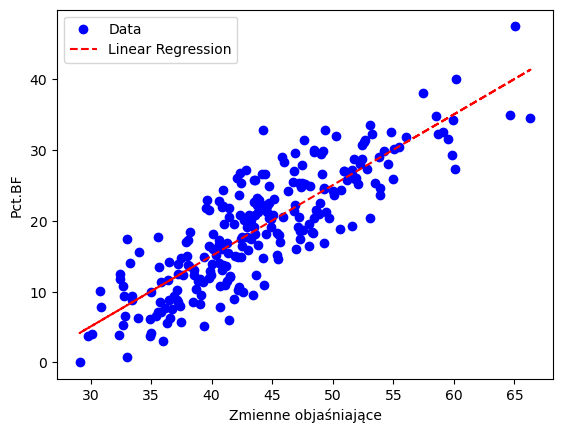

Wlasnosci liniowe: 
slope: 1.0000000000000004
intercept: -24.93279166161728
r^2: 0.7120281221662406
p_value: 5.454284442817139e-69


In [13]:
model13 = LinearRegression()
model13.fit(x11, y11)
plt.scatter(x11, y11, color="blue", label="Data")
plt.plot(x11, model13.predict(x11), linestyle="dashed", color="red", label="Linear Regression")
plt.ylabel("Pct.BF")
plt.xlabel("Zmienne objaśniające")
plt.legend()
plt.show()


slope, intercept, r, p, ser=linregress(x11.squeeze(), y11.squeeze())
print(f"Wlasnosci liniowe: \nslope: {slope}\nintercept: {intercept}\nr^2: {r*r}\np_value: {p}")

### Zależność Abdomen od Waist, Hip oraz Chest

In [7]:
x12 = body_fat[["Waist","Hip","Chest"]]
y12 = body_fat["Abdomen"]
model14 = LinearRegression()
model14.fit(x12, y12)
x12_1,x12_2,x12_3 = model14.coef_
x12 = body_fat["Waist"]*x12_1+body_fat["Hip"]*x12_2+body_fat["Chest"]*x12_3
x12 = np.array(x12)
x12 = x12.reshape(-1,1)

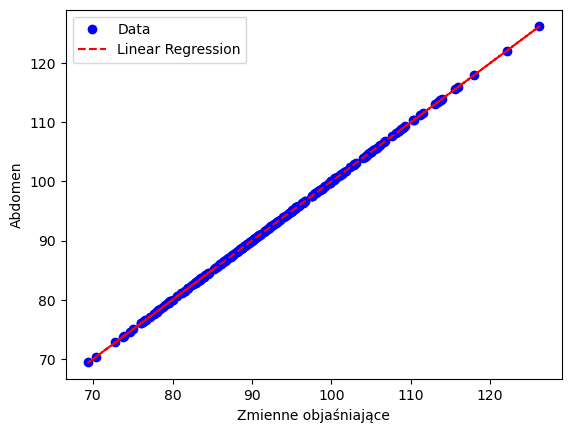

Wlasnosci liniowe: 
slope: 0.9999999999999992
intercept: -5.824783215757634e-07
r^2: 0.9999999999999944
p_value: 0.0


In [8]:
model15 = LinearRegression()
model15.fit(x12, y12)
plt.scatter(x12, y12, color="blue", label="Data")
plt.plot(x12, model15.predict(x12), linestyle="dashed", color="red", label="Linear Regression")
plt.ylabel("Abdomen")
plt.xlabel("Zmienne objaśniające")
plt.legend()
plt.show()


slope, intercept, r, p, ser=linregress(x12.squeeze(), y12.squeeze())
print(f"Wlasnosci liniowe: \nslope: {slope}\nintercept: {intercept}\nr^2: {r*r}\np_value: {p}")